Import libraries

In [1]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

Load dataset

In [86]:
df = pd.read_csv('/content/heart_failure_clinical_records_dataset.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [88]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [89]:
df.isna().sum()

,0
age,0
anaemia,0
creatinine_phosphokinase,0
diabetes,0
ejection_fraction,0
high_blood_pressure,0
platelets,0
serum_creatinine,0
serum_sodium,0
sex,0


In [90]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

Encoding categorical columns using LabelEncoder

In [91]:
label_cols = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'DEATH_EVENT']
label_encoder = LabelEncoder()

for col in label_cols:
    df[col] = label_encoder.fit_transform(df[col])

Determine features (X) and targets (y)

In [92]:
X = df.drop(['DEATH_EVENT'], axis=1)
y = df['DEATH_EVENT']

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Standardization of numeric features

In [94]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Convert data to tensor

In [95]:
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

Constructing an MLP model for regression

In [96]:
# Defining the MLP model for classification
class MLPClassification(nn.Module):
    def __init__(self, input_size, hidden_layers, neurons, activation):
        super(MLPClassification, self).__init__()
        self.input_size = input_size
        self.hidden_layers = hidden_layers
        self.neurons = neurons
        self.activation = activation

        # Creating input to hidden layer
        layers = []
        layers.append(nn.Linear(self.input_size, self.neurons))

        # Adding hidden layers
        for _ in range(self.hidden_layers - 1):
            layers.append(self.activation())  # Activation function
            layers.append(nn.Linear(self.neurons, self.neurons))

        # Adding the output layer with the number of classes (e.g., 2 or more)
        layers.append(nn.Linear(self.neurons, len(y.unique())))
        self.model = nn.Sequential(*layers)

    def forward(self, x):
        # Forward pass through the model
        return self.model(x)


Device setup (GPU if available)

In [97]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

Hyperparameters to be tested

In [98]:
hidden_layers = [1, 2, 3]
neurons = [4, 8, 16, 32, 64]
activations = [nn.Sigmoid, nn.Softmax, nn.ReLU, nn.Tanh]
epochs_list = [1,10,25,50,100,250]
learning_rates = [10, 1, 0.1, 0.01, 0.001, 0.0001]
batch_sizes = [16,32,64,128,256,512]

results = []

In [99]:
# Conducting experiments with different hyperparameter combinations
for layers in hidden_layers:  # Loop over the number of hidden layers
    for neuron in neurons:  # Loop over the number of neurons per layer
        for activation in activations:  # Loop over activation functions
            for epochs in epochs_list:  # Loop over the number of epochs
                for lr in learning_rates:  # Loop over learning rates
                    for batch_size in batch_sizes:  # Loop over batch sizes
                        # Create the model and move it to the device (GPU or CPU)
                        model = MLPClassification(input_size=X_train_tensor.shape[1],
                                                  hidden_layers=layers,
                                                  neurons=neuron,
                                                  activation=activation).to(device)

                        # Define the loss function and optimizer
                        criterion = nn.CrossEntropyLoss()  # For multi-class classification
                        optimizer = optim.Adam(model.parameters(), lr=lr)

                        # Training loop
                        for epoch in range(epochs):
                            model.train()  # Set the model to training mode
                            optimizer.zero_grad()  # Clear the gradients
                            outputs = model(X_train_tensor.to(device))  # Forward pass
                            loss = criterion(outputs, y_train_tensor.to(device))  # Calculate loss
                            loss.backward()  # Backward pass
                            optimizer.step()  # Update weights

                        # Evaluate the model after training
                        model.eval()  # Set the model to evaluation mode
                        with torch.no_grad():  # Disable gradient calculation
                            outputs = model(X_test_tensor.to(device))  # Forward pass on test data
                            _, predicted = torch.max(outputs, 1)  # Get the predicted class with the highest probability
                            accuracy = accuracy_score(y_test_tensor.cpu(), predicted.cpu())  # Calculate accuracy

                        # Save the results
                        results.append({
                            'layers': layers,  # Number of layers
                            'neurons': neuron,  # Number of neurons per layer
                            'activation': activation.__name__,  # Name of the activation function
                            'epochs': epochs,  # Number of training epochs
                            'lr': lr,  # Learning rate
                            'batch_size': batch_size,  # Batch size used during training
                            'accuracy': accuracy  # Model's accuracy
                        })
                        # Print the results for the current hyperparameter combination
                        print(f"Layers: {layers}, Neurons: {neuron}, Activation: {activation.__name__}, Epochs: {epochs}, LR: {lr}, Batch Size: {batch_size}, Accuracy: {accuracy}")


Layers: 1, Neurons: 4, Activation: Sigmoid, Epochs: 1, LR: 10, Batch Size: 16, Accuracy: 0.7
Layers: 1, Neurons: 4, Activation: Sigmoid, Epochs: 1, LR: 10, Batch Size: 32, Accuracy: 0.6166666666666667
Layers: 1, Neurons: 4, Activation: Sigmoid, Epochs: 1, LR: 10, Batch Size: 64, Accuracy: 0.6666666666666666
Layers: 1, Neurons: 4, Activation: Sigmoid, Epochs: 1, LR: 10, Batch Size: 128, Accuracy: 0.6666666666666666
Layers: 1, Neurons: 4, Activation: Sigmoid, Epochs: 1, LR: 10, Batch Size: 256, Accuracy: 0.6
Layers: 1, Neurons: 4, Activation: Sigmoid, Epochs: 1, LR: 10, Batch Size: 512, Accuracy: 0.31666666666666665
Layers: 1, Neurons: 4, Activation: Sigmoid, Epochs: 1, LR: 1, Batch Size: 16, Accuracy: 0.36666666666666664
Layers: 1, Neurons: 4, Activation: Sigmoid, Epochs: 1, LR: 1, Batch Size: 32, Accuracy: 0.6666666666666666
Layers: 1, Neurons: 4, Activation: Sigmoid, Epochs: 1, LR: 1, Batch Size: 64, Accuracy: 0.3
Layers: 1, Neurons: 4, Activation: Sigmoid, Epochs: 1, LR: 1, Batch Siz

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 16, Accuracy: 0.5833333333333334
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 32, Accuracy: 0.5833333333333334
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 64, Accuracy: 0.5833333333333334
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 128, Accuracy: 0.25
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 256, Accuracy: 0.5833333333333334
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 512, Accuracy: 0.6166666666666667
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 16, Accuracy: 0.5833333333333334
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 32, Accuracy: 0.7


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 64, Accuracy: 0.7
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 128, Accuracy: 0.5833333333333334
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 256, Accuracy: 0.5666666666666667
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 512, Accuracy: 0.5833333333333334
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 16, Accuracy: 0.7833333333333333
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 32, Accuracy: 0.7833333333333333
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 64, Accuracy: 0.8166666666666667
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 128, Accuracy: 0.7833333333333333
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 256, Accuracy: 0.7166666666666667
Layers: 2, Neurons: 4, Activ

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 16, Accuracy: 0.6
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 32, Accuracy: 0.5833333333333334
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 64, Accuracy: 0.5833333333333334
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 128, Accuracy: 0.5833333333333334
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 256, Accuracy: 0.5833333333333334
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 512, Accuracy: 0.5833333333333334
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 16, Accuracy: 0.5833333333333334
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 32, Accuracy: 0.4166666666666667
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 64, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 128, Accuracy: 0.4166666666666667
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 256, Accuracy: 0.5833333333333334
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 512, Accuracy: 0.5833333333333334
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 16, Accuracy: 0.5833333333333334
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 32, Accuracy: 0.5833333333333334
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 64, Accuracy: 0.4166666666666667
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 128, Accuracy: 0.5833333333333334
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 256, Accuracy: 0.4166666666666667
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 512, Accuracy:

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 16, Accuracy: 0.6
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 32, Accuracy: 0.5
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 64, Accuracy: 0.6666666666666666
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 128, Accuracy: 0.25


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 256, Accuracy: 0.65
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 512, Accuracy: 0.7
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 16, Accuracy: 0.5833333333333334
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 32, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 64, Accuracy: 0.75
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 128, Accuracy: 0.7833333333333333
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 256, Accuracy: 0.7
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 512, Accuracy: 0.5833333333333334
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 16, Accuracy: 0.6833333333333333


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 32, Accuracy: 0.75
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 64, Accuracy: 0.6833333333333333
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 128, Accuracy: 0.7666666666666667
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 256, Accuracy: 0.7833333333333333


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 512, Accuracy: 0.6833333333333333
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 16, Accuracy: 0.5833333333333334
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 32, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 64, Accuracy: 0.5833333333333334
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 128, Accuracy: 0.5833333333333334
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 256, Accuracy: 0.5833333333333334
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 512, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 16, Accuracy: 0.5833333333333334
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 32, Accuracy: 0.5833333333333334
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 64, Accuracy: 0.5833333333333334
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 128, Accuracy: 0.4166666666666667


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 256, Accuracy: 0.5833333333333334
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 512, Accuracy: 0.5833333333333334
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 16, Accuracy: 0.5833333333333334
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 32, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 64, Accuracy: 0.5833333333333334
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 128, Accuracy: 0.4166666666666667
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 256, Accuracy: 0.65
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 512, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 16, Accuracy: 0.6333333333333333
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 32, Accuracy: 0.4166666666666667


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 64, Accuracy: 0.36666666666666664
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 128, Accuracy: 0.75


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 256, Accuracy: 0.65
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 512, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 16, Accuracy: 0.7
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 32, Accuracy: 0.7166666666666667


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 64, Accuracy: 0.7166666666666667
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 128, Accuracy: 0.7833333333333333


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 256, Accuracy: 0.7666666666666667
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 512, Accuracy: 0.7666666666666667


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 16, Accuracy: 0.7833333333333333
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 32, Accuracy: 0.7166666666666667
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 64, Accuracy: 0.7166666666666667
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 128, Accuracy: 0.6833333333333333


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 256, Accuracy: 0.6666666666666666
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 512, Accuracy: 0.7


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 16, Accuracy: 0.7166666666666667
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 32, Accuracy: 0.7


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 64, Accuracy: 0.5833333333333334
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 128, Accuracy: 0.8166666666666667


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 256, Accuracy: 0.5833333333333334
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 512, Accuracy: 0.7333333333333333


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 16, Accuracy: 0.65
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 32, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 64, Accuracy: 0.5833333333333334
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 128, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 256, Accuracy: 0.5833333333333334
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 512, Accuracy: 0.6
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 16, Accuracy: 0.4166666666666667


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 32, Accuracy: 0.4166666666666667
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 64, Accuracy: 0.5833333333333334
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 128, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 256, Accuracy: 0.4166666666666667
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 512, Accuracy: 0.4166666666666667
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 16, Accuracy: 0.4
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 32, Accuracy: 0.5166666666666667


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 64, Accuracy: 0.5833333333333334
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 128, Accuracy: 0.6333333333333333


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 256, Accuracy: 0.6333333333333333
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 512, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 16, Accuracy: 0.7
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 32, Accuracy: 0.6666666666666666


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 64, Accuracy: 0.7333333333333333
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 128, Accuracy: 0.7833333333333333


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 256, Accuracy: 0.7
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 512, Accuracy: 0.7166666666666667


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 16, Accuracy: 0.7
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 32, Accuracy: 0.65


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 64, Accuracy: 0.65
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 128, Accuracy: 0.7166666666666667


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 256, Accuracy: 0.7666666666666667
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 512, Accuracy: 0.7


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 16, Accuracy: 0.7833333333333333
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 32, Accuracy: 0.7666666666666667


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 64, Accuracy: 0.75
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 128, Accuracy: 0.7333333333333333


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 256, Accuracy: 0.7666666666666667
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 512, Accuracy: 0.75


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 16, Accuracy: 0.4166666666666667
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 32, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 64, Accuracy: 0.6
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 128, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 256, Accuracy: 0.6
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 512, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 16, Accuracy: 0.4166666666666667
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 32, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 64, Accuracy: 0.5833333333333334
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 128, Accuracy: 0.4166666666666667


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 256, Accuracy: 0.5833333333333334
Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 512, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 16, Accuracy: 0.55


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 32, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 64, Accuracy: 0.6833333333333333


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 128, Accuracy: 0.7166666666666667


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 256, Accuracy: 0.55


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 512, Accuracy: 0.8


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 16, Accuracy: 0.7166666666666667


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 32, Accuracy: 0.75


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 64, Accuracy: 0.75


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 128, Accuracy: 0.7


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 256, Accuracy: 0.6833333333333333


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 512, Accuracy: 0.75


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 16, Accuracy: 0.7333333333333333


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 32, Accuracy: 0.7


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 64, Accuracy: 0.7


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 128, Accuracy: 0.7


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 256, Accuracy: 0.7333333333333333


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 512, Accuracy: 0.7166666666666667


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 16, Accuracy: 0.7166666666666667


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 32, Accuracy: 0.7


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 64, Accuracy: 0.7666666666666667


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 128, Accuracy: 0.6666666666666666


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 256, Accuracy: 0.7333333333333333


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 512, Accuracy: 0.7


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 16, Accuracy: 0.6833333333333333


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 32, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 64, Accuracy: 0.6


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 128, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 256, Accuracy: 0.6666666666666666


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 512, Accuracy: 0.6333333333333333


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 16, Accuracy: 0.4166666666666667


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 32, Accuracy: 0.4166666666666667


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 64, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 128, Accuracy: 0.4166666666666667


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 256, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 512, Accuracy: 0.5833333333333334
Layers: 2, Neurons: 4, Activation: ReLU, Epochs: 1, LR: 10, Batch Size: 16, Accuracy: 0.65
Layers: 2, Neurons: 4, Activation: ReLU, Epochs: 1, LR: 10, Batch Size: 32, Accuracy: 0.4166666666666667
Layers: 2, Neurons: 4, Activation: ReLU, Epochs: 1, LR: 10, Batch Size: 64, Accuracy: 0.5833333333333334
Layers: 2, Neurons: 4, Activation: ReLU, Epochs: 1, LR: 10, Batch Size: 128, Accuracy: 0.5833333333333334
Layers: 2, Neurons: 4, Activation: ReLU, Epochs: 1, LR: 10, Batch Size: 256, Accuracy: 0.4166666666666667
Layers: 2, Neurons: 4, Activation: ReLU, Epochs: 1, LR: 10, Batch Size: 512, Accuracy: 0.5833333333333334
Layers: 2, Neurons: 4, Activation: ReLU, Epochs: 1, LR: 1, Batch Size: 16, Accuracy: 0.65
Layers: 2, Neurons: 4, Activation: ReLU, Epochs: 1, LR: 1, Batch Size: 32, Accuracy: 0.5833333333333334
Layers: 2, Neurons: 4, Activation: ReLU, Epochs: 1, LR: 1, Batch Size: 6

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 64, Accuracy: 0.7333333333333333
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 128, Accuracy: 0.5666666666666667
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 256, Accuracy: 0.5666666666666667
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 512, Accuracy: 0.6
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 16, Accuracy: 0.35
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 32, Accuracy: 0.5833333333333334
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 64, Accuracy: 0.6333333333333333
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 128, Accuracy: 0.7666666666666667
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 256, Accuracy: 0.6833333333333333
Layers: 2, Neurons: 8, Activation: Softmax, Epoc

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 64, Accuracy: 0.7333333333333333
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 128, Accuracy: 0.8166666666666667
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 256, Accuracy: 0.75
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 512, Accuracy: 0.7333333333333333
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 16, Accuracy: 0.5833333333333334
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 32, Accuracy: 0.5833333333333334
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 64, Accuracy: 0.5833333333333334
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 128, Accuracy: 0.5833333333333334
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 256, Accuracy: 0.5833333333333334
Layers: 2, Neu

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 64, Accuracy: 0.5833333333333334
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 128, Accuracy: 0.4166666666666667
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 256, Accuracy: 0.5833333333333334
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 512, Accuracy: 0.5666666666666667
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 16, Accuracy: 0.4166666666666667
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 32, Accuracy: 0.6
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 64, Accuracy: 0.5833333333333334
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 128, Accuracy: 0.5833333333333334
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 256, Accuracy: 0.41666666666666

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 32, Accuracy: 0.6
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 64, Accuracy: 0.7166666666666667
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 128, Accuracy: 0.6
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 256, Accuracy: 0.6166666666666667
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 512, Accuracy: 0.55
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 16, Accuracy: 0.7666666666666667


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 32, Accuracy: 0.5
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 64, Accuracy: 0.7333333333333333
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 128, Accuracy: 0.7
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 256, Accuracy: 0.8
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 512, Accuracy: 0.7166666666666667
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 16, Accuracy: 0.7


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 32, Accuracy: 0.65
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 64, Accuracy: 0.6833333333333333
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 128, Accuracy: 0.6833333333333333
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 256, Accuracy: 0.6833333333333333
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 512, Accuracy: 0.7333333333333333
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 16, Accuracy: 0.6166666666666667


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 32, Accuracy: 0.5833333333333334
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 64, Accuracy: 0.5833333333333334
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 128, Accuracy: 0.5833333333333334
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 256, Accuracy: 0.5833333333333334
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 512, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 16, Accuracy: 0.5833333333333334
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 32, Accuracy: 0.5833333333333334
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 64, Accuracy: 0.4166666666666667
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 128, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 256, Accuracy: 0.5833333333333334
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 512, Accuracy: 0.5833333333333334
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 16, Accuracy: 0.5833333333333334
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 32, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 64, Accuracy: 0.5833333333333334
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 128, Accuracy: 0.4166666666666667
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 256, Accuracy: 0.4166666666666667
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 512, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 16, Accuracy: 0.6333333333333333
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 32, Accuracy: 0.6333333333333333


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 64, Accuracy: 0.6833333333333333
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 128, Accuracy: 0.6666666666666666


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 256, Accuracy: 0.6166666666666667
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 512, Accuracy: 0.5833333333333334
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 16, Accuracy: 0.75


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 32, Accuracy: 0.7833333333333333
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 64, Accuracy: 0.45
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 128, Accuracy: 0.75


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 256, Accuracy: 0.6833333333333333
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 512, Accuracy: 0.6666666666666666


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 16, Accuracy: 0.6833333333333333
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 32, Accuracy: 0.7166666666666667
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 64, Accuracy: 0.65


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 128, Accuracy: 0.7166666666666667
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 256, Accuracy: 0.6833333333333333
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 512, Accuracy: 0.6833333333333333


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 16, Accuracy: 0.7
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 32, Accuracy: 0.7166666666666667


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 64, Accuracy: 0.7666666666666667
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 128, Accuracy: 0.7333333333333333


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 256, Accuracy: 0.75
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 512, Accuracy: 0.7


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 16, Accuracy: 0.5833333333333334
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 32, Accuracy: 0.5833333333333334
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 64, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 128, Accuracy: 0.45
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 256, Accuracy: 0.5833333333333334
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 512, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 16, Accuracy: 0.6166666666666667
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 32, Accuracy: 0.4166666666666667
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 64, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 128, Accuracy: 0.5833333333333334
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 256, Accuracy: 0.48333333333333334
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 512, Accuracy: 0.6


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 16, Accuracy: 0.5666666666666667
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 32, Accuracy: 0.6666666666666666


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 64, Accuracy: 0.55
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 128, Accuracy: 0.6833333333333333


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 256, Accuracy: 0.65
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 512, Accuracy: 0.6666666666666666


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 16, Accuracy: 0.7
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 32, Accuracy: 0.7333333333333333


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 64, Accuracy: 0.7666666666666667
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 128, Accuracy: 0.7833333333333333


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 256, Accuracy: 0.7166666666666667
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 512, Accuracy: 0.7666666666666667


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 16, Accuracy: 0.6333333333333333
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 32, Accuracy: 0.7333333333333333


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 64, Accuracy: 0.6666666666666666
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 128, Accuracy: 0.6666666666666666


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 256, Accuracy: 0.7166666666666667
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 512, Accuracy: 0.7833333333333333


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 16, Accuracy: 0.7333333333333333
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 32, Accuracy: 0.6833333333333333


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 64, Accuracy: 0.6833333333333333
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 128, Accuracy: 0.7


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 256, Accuracy: 0.75
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 512, Accuracy: 0.6166666666666667


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 16, Accuracy: 0.5833333333333334
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 32, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 64, Accuracy: 0.5833333333333334
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 128, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 256, Accuracy: 0.5833333333333334
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 512, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 16, Accuracy: 0.5833333333333334
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 32, Accuracy: 0.4166666666666667


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 64, Accuracy: 0.4166666666666667
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 128, Accuracy: 0.4


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 256, Accuracy: 0.43333333333333335
Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 512, Accuracy: 0.4166666666666667


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 16, Accuracy: 0.6333333333333333


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 32, Accuracy: 0.65


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 64, Accuracy: 0.6


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 128, Accuracy: 0.6333333333333333


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 256, Accuracy: 0.5666666666666667


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 512, Accuracy: 0.5666666666666667


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 16, Accuracy: 0.65


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 32, Accuracy: 0.7


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 64, Accuracy: 0.7666666666666667


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 128, Accuracy: 0.6333333333333333


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 256, Accuracy: 0.7333333333333333


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 512, Accuracy: 0.7


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 16, Accuracy: 0.6666666666666666


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 32, Accuracy: 0.6833333333333333


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 64, Accuracy: 0.6833333333333333


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 128, Accuracy: 0.6166666666666667


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 256, Accuracy: 0.6166666666666667


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 512, Accuracy: 0.6833333333333333


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 16, Accuracy: 0.6666666666666666


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 32, Accuracy: 0.7


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 64, Accuracy: 0.6833333333333333


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 128, Accuracy: 0.7


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 256, Accuracy: 0.65


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 512, Accuracy: 0.65


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 16, Accuracy: 0.6833333333333333


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 32, Accuracy: 0.75


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 64, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 128, Accuracy: 0.65


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 256, Accuracy: 0.6666666666666666


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 512, Accuracy: 0.7166666666666667


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 16, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 32, Accuracy: 0.4166666666666667


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 64, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 128, Accuracy: 0.5666666666666667


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 256, Accuracy: 0.4166666666666667


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 512, Accuracy: 0.5833333333333334
Layers: 2, Neurons: 8, Activation: ReLU, Epochs: 1, LR: 10, Batch Size: 16, Accuracy: 0.6
Layers: 2, Neurons: 8, Activation: ReLU, Epochs: 1, LR: 10, Batch Size: 32, Accuracy: 0.6333333333333333
Layers: 2, Neurons: 8, Activation: ReLU, Epochs: 1, LR: 10, Batch Size: 64, Accuracy: 0.5833333333333334
Layers: 2, Neurons: 8, Activation: ReLU, Epochs: 1, LR: 10, Batch Size: 128, Accuracy: 0.6333333333333333
Layers: 2, Neurons: 8, Activation: ReLU, Epochs: 1, LR: 10, Batch Size: 256, Accuracy: 0.6166666666666667
Layers: 2, Neurons: 8, Activation: ReLU, Epochs: 1, LR: 10, Batch Size: 512, Accuracy: 0.4166666666666667
Layers: 2, Neurons: 8, Activation: ReLU, Epochs: 1, LR: 1, Batch Size: 16, Accuracy: 0.5833333333333334
Layers: 2, Neurons: 8, Activation: ReLU, Epochs: 1, LR: 1, Batch Size: 32, Accuracy: 0.3333333333333333
Layers: 2, Neurons: 8, Activation: ReLU, Epochs: 1, LR: 1, 

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 32, Accuracy: 0.5833333333333334
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 64, Accuracy: 0.6
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 128, Accuracy: 0.65
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 256, Accuracy: 0.6166666666666667
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 512, Accuracy: 0.6
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 16, Accuracy: 0.6333333333333333
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 32, Accuracy: 0.6833333333333333
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 64, Accuracy: 0.7
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 128, Accuracy: 0.6833333333333333
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 1, Batch

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 16, Accuracy: 0.75
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 32, Accuracy: 0.75
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 64, Accuracy: 0.7833333333333333
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 128, Accuracy: 0.7166666666666667
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 256, Accuracy: 0.75
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 512, Accuracy: 0.75
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 16, Accuracy: 0.5833333333333334
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 32, Accuracy: 0.5833333333333334
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 64, Accuracy: 0.5833333333333334
Layers: 2, Neurons: 16, Activation: Softmax, Epochs

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 16, Accuracy: 0.5833333333333334
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 32, Accuracy: 0.6
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 64, Accuracy: 0.5833333333333334
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 128, Accuracy: 0.5833333333333334
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 256, Accuracy: 0.5833333333333334
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 512, Accuracy: 0.5833333333333334
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 16, Accuracy: 0.38333333333333336
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 32, Accuracy: 0.5833333333333334
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 64, Accuracy: 0.58333333

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 128, Accuracy: 0.4166666666666667
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 256, Accuracy: 0.4166666666666667
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 512, Accuracy: 0.5833333333333334
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 16, Accuracy: 0.5833333333333334
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 32, Accuracy: 0.6666666666666666


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 64, Accuracy: 0.5
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 128, Accuracy: 0.6833333333333333
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 256, Accuracy: 0.6833333333333333
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 512, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 16, Accuracy: 0.5
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 32, Accuracy: 0.7666666666666667
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 64, Accuracy: 0.6
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 128, Accuracy: 0.7333333333333333


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 256, Accuracy: 0.7
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 512, Accuracy: 0.65
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 16, Accuracy: 0.6166666666666667
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 32, Accuracy: 0.65
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 64, Accuracy: 0.6833333333333333


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 128, Accuracy: 0.6
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 256, Accuracy: 0.6333333333333333
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 512, Accuracy: 0.7
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 16, Accuracy: 0.6333333333333333


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 32, Accuracy: 0.65
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 64, Accuracy: 0.65
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 128, Accuracy: 0.6166666666666667
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 256, Accuracy: 0.5833333333333334
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 512, Accuracy: 0.6

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)



Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 16, Accuracy: 0.5833333333333334
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 32, Accuracy: 0.5833333333333334
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 64, Accuracy: 0.5833333333333334
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 128, Accuracy: 0.4166666666666667


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 256, Accuracy: 0.5833333333333334
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 512, Accuracy: 0.5833333333333334
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 16, Accuracy: 0.5833333333333334
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 32, Accuracy: 0.4166666666666667


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 64, Accuracy: 0.5833333333333334
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 128, Accuracy: 0.5833333333333334
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 256, Accuracy: 0.4166666666666667
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 512, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 16, Accuracy: 0.7
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 32, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 64, Accuracy: 0.6666666666666666
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 128, Accuracy: 0.4166666666666667


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 256, Accuracy: 0.7
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 512, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 16, Accuracy: 0.7
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 32, Accuracy: 0.7333333333333333


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 64, Accuracy: 0.7333333333333333
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 128, Accuracy: 0.65


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 256, Accuracy: 0.5666666666666667
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 512, Accuracy: 0.6833333333333333


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 16, Accuracy: 0.7
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 32, Accuracy: 0.7166666666666667


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 64, Accuracy: 0.65
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 128, Accuracy: 0.7333333333333333


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 256, Accuracy: 0.6833333333333333
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 512, Accuracy: 0.65
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 16, Accuracy: 0.75


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 32, Accuracy: 0.7333333333333333
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 64, Accuracy: 0.75
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 128, Accuracy: 0.75


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 256, Accuracy: 0.7666666666666667
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 512, Accuracy: 0.75
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 16, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 32, Accuracy: 0.5833333333333334
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 64, Accuracy: 0.5833333333333334
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 128, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 256, Accuracy: 0.5833333333333334
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 512, Accuracy: 0.5833333333333334
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 16, Accuracy: 0.4166666666666667


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 32, Accuracy: 0.4166666666666667
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 64, Accuracy: 0.5833333333333334
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 128, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 256, Accuracy: 0.5833333333333334
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 512, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 16, Accuracy: 0.6
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 32, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 64, Accuracy: 0.6166666666666667
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 128, Accuracy: 0.7


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 256, Accuracy: 0.65
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 512, Accuracy: 0.6166666666666667


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 16, Accuracy: 0.6833333333333333
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 32, Accuracy: 0.75


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 64, Accuracy: 0.6833333333333333
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 128, Accuracy: 0.6666666666666666


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 256, Accuracy: 0.6833333333333333
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 512, Accuracy: 0.8166666666666667


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 16, Accuracy: 0.7166666666666667
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 32, Accuracy: 0.65


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 64, Accuracy: 0.65
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 128, Accuracy: 0.6666666666666666


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 256, Accuracy: 0.7
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 512, Accuracy: 0.7333333333333333


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 16, Accuracy: 0.6833333333333333
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 32, Accuracy: 0.6666666666666666


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 64, Accuracy: 0.6666666666666666
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 128, Accuracy: 0.6666666666666666


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 256, Accuracy: 0.6333333333333333
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 512, Accuracy: 0.6666666666666666


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 16, Accuracy: 0.5833333333333334
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 32, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 64, Accuracy: 0.5833333333333334
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 128, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 256, Accuracy: 0.6
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 512, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 16, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 32, Accuracy: 0.4


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 64, Accuracy: 0.5833333333333334
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 128, Accuracy: 0.4166666666666667


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 256, Accuracy: 0.5833333333333334
Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 512, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 16, Accuracy: 0.6


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 32, Accuracy: 0.6166666666666667


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 64, Accuracy: 0.5333333333333333


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 128, Accuracy: 0.65


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 256, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 512, Accuracy: 0.6833333333333333


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 16, Accuracy: 0.8166666666666667


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 32, Accuracy: 0.7


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 64, Accuracy: 0.7333333333333333


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 128, Accuracy: 0.7666666666666667


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 256, Accuracy: 0.7333333333333333


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 512, Accuracy: 0.6666666666666666


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 16, Accuracy: 0.6666666666666666


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 32, Accuracy: 0.7


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 64, Accuracy: 0.6666666666666666


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 128, Accuracy: 0.6666666666666666


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 256, Accuracy: 0.7166666666666667


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 512, Accuracy: 0.6666666666666666


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 16, Accuracy: 0.6833333333333333


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 32, Accuracy: 0.7


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 64, Accuracy: 0.6833333333333333


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 128, Accuracy: 0.6833333333333333


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 256, Accuracy: 0.65


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 512, Accuracy: 0.75


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 16, Accuracy: 0.75


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 32, Accuracy: 0.7


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 64, Accuracy: 0.75


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 128, Accuracy: 0.7


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 256, Accuracy: 0.7166666666666667


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 512, Accuracy: 0.7333333333333333


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 16, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 32, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 64, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 128, Accuracy: 0.4166666666666667


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 256, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 512, Accuracy: 0.5833333333333334
Layers: 2, Neurons: 16, Activation: ReLU, Epochs: 1, LR: 10, Batch Size: 16, Accuracy: 0.5833333333333334
Layers: 2, Neurons: 16, Activation: ReLU, Epochs: 1, LR: 10, Batch Size: 32, Accuracy: 0.4166666666666667
Layers: 2, Neurons: 16, Activation: ReLU, Epochs: 1, LR: 10, Batch Size: 64, Accuracy: 0.6166666666666667
Layers: 2, Neurons: 16, Activation: ReLU, Epochs: 1, LR: 10, Batch Size: 128, Accuracy: 0.55
Layers: 2, Neurons: 16, Activation: ReLU, Epochs: 1, LR: 10, Batch Size: 256, Accuracy: 0.4666666666666667
Layers: 2, Neurons: 16, Activation: ReLU, Epochs: 1, LR: 10, Batch Size: 512, Accuracy: 0.55
Layers: 2, Neurons: 16, Activation: ReLU, Epochs: 1, LR: 1, Batch Size: 16, Accuracy: 0.5833333333333334
Layers: 2, Neurons: 16, Activation: ReLU, Epochs: 1, LR: 1, Batch Size: 32, Accuracy: 0.4166666666666667
Layers: 2, Neurons: 16, Activation: ReLU, Epochs: 1, LR: 1, Bat

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 32, Accuracy: 0.6166666666666667
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 64, Accuracy: 0.6
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 128, Accuracy: 0.6333333333333333
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 256, Accuracy: 0.65
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 512, Accuracy: 0.4666666666666667
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 16, Accuracy: 0.6833333333333333
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 32, Accuracy: 0.7666666666666667
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 64, Accuracy: 0.6666666666666666


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 128, Accuracy: 0.7
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 256, Accuracy: 0.5666666666666667
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 512, Accuracy: 0.75
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 16, Accuracy: 0.7
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 32, Accuracy: 0.7
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 64, Accuracy: 0.7166666666666667
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 128, Accuracy: 0.7
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 256, Accuracy: 0.7166666666666667
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 512, Accuracy: 0.7666666666666667
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Si

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 64, Accuracy: 0.5833333333333334
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 128, Accuracy: 0.5833333333333334
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 256, Accuracy: 0.5833333333333334
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 512, Accuracy: 0.5833333333333334
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 16, Accuracy: 0.5833333333333334
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 32, Accuracy: 0.5833333333333334
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 64, Accuracy: 0.5833333333333334
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 128, Accuracy: 0.5333333333333333
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 256, Accuracy: 0

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 64, Accuracy: 0.5833333333333334
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 128, Accuracy: 0.5833333333333334
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 256, Accuracy: 0.5166666666666667
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 512, Accuracy: 0.5833333333333334
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 16, Accuracy: 0.5333333333333333
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 32, Accuracy: 0.5666666666666667
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 64, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 128, Accuracy: 0.6833333333333333
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 256, Accuracy: 0.5666666666666667
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 512, Accuracy: 0.6
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 16, Accuracy: 0.6166666666666667
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 32, Accuracy: 0.7333333333333333


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 64, Accuracy: 0.7333333333333333
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 128, Accuracy: 0.7833333333333333
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 256, Accuracy: 0.6333333333333333
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 512, Accuracy: 0.5833333333333334
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 16, Accuracy: 0.6666666666666666


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 32, Accuracy: 0.6833333333333333
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 64, Accuracy: 0.65
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 128, Accuracy: 0.6833333333333333
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 256, Accuracy: 0.6666666666666666
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 512, Accuracy: 0.6666666666666666


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 16, Accuracy: 0.65
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 32, Accuracy: 0.7833333333333333
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 64, Accuracy: 0.7166666666666667
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 128, Accuracy: 0.7
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 256, Accuracy: 0.6833333333333333
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 512, Accuracy: 0.65


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 16, Accuracy: 0.5833333333333334
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 32, Accuracy: 0.5833333333333334
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 64, Accuracy: 0.5833333333333334
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 128, Accuracy: 0.5833333333333334
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 256, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 512, Accuracy: 0.5833333333333334
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 16, Accuracy: 0.5833333333333334
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 32, Accuracy: 0.4166666666666667
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 64, Accuracy: 0.65
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 128, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 256, Accuracy: 0.5833333333333334
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 512, Accuracy: 0.5833333333333334
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 16, Accuracy: 0.5666666666666667


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 32, Accuracy: 0.5333333333333333
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 64, Accuracy: 0.4166666666666667
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 128, Accuracy: 0.5666666666666667


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 256, Accuracy: 0.5166666666666667
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 512, Accuracy: 0.6
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 16, Accuracy: 0.7
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 32, Accuracy: 0.7166666666666667


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 64, Accuracy: 0.7333333333333333
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 128, Accuracy: 0.7333333333333333


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 256, Accuracy: 0.5666666666666667
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 512, Accuracy: 0.6
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 16, Accuracy: 0.6666666666666666


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 32, Accuracy: 0.75
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 64, Accuracy: 0.6833333333333333
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 128, Accuracy: 0.65


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 256, Accuracy: 0.6666666666666666
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 512, Accuracy: 0.65
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 16, Accuracy: 0.7666666666666667


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 32, Accuracy: 0.7666666666666667
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 64, Accuracy: 0.75
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 128, Accuracy: 0.7333333333333333


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 256, Accuracy: 0.7166666666666667
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 512, Accuracy: 0.75
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 16, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 32, Accuracy: 0.5833333333333334
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 64, Accuracy: 0.5833333333333334
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 128, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 256, Accuracy: 0.5833333333333334
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 512, Accuracy: 0.5833333333333334
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 16, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 32, Accuracy: 0.5833333333333334
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 64, Accuracy: 0.5833333333333334
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 128, Accuracy: 0.4166666666666667


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 256, Accuracy: 0.5833333333333334
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 512, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 16, Accuracy: 0.6666666666666666
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 32, Accuracy: 0.6


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 64, Accuracy: 0.7166666666666667
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 128, Accuracy: 0.6166666666666667


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 256, Accuracy: 0.6166666666666667
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 512, Accuracy: 0.6


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 16, Accuracy: 0.7


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 32, Accuracy: 0.7666666666666667


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 64, Accuracy: 0.7333333333333333


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 128, Accuracy: 0.7166666666666667


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 256, Accuracy: 0.7


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 512, Accuracy: 0.7666666666666667
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 16, Accuracy: 0.6833333333333333


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 32, Accuracy: 0.6666666666666666
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 64, Accuracy: 0.6833333333333333


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 128, Accuracy: 0.6833333333333333
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 256, Accuracy: 0.65


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 512, Accuracy: 0.6666666666666666
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 16, Accuracy: 0.6666666666666666


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 32, Accuracy: 0.65


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 64, Accuracy: 0.6833333333333333
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 128, Accuracy: 0.6666666666666666


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 256, Accuracy: 0.6833333333333333
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 512, Accuracy: 0.6666666666666666


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 16, Accuracy: 0.5833333333333334
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 32, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 64, Accuracy: 0.5833333333333334
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 128, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 256, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 512, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 16, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 32, Accuracy: 0.4166666666666667


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 64, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 128, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 256, Accuracy: 0.5833333333333334
Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 512, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 16, Accuracy: 0.6833333333333333


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 32, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 64, Accuracy: 0.7166666666666667


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 128, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 256, Accuracy: 0.5166666666666667


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 512, Accuracy: 0.6333333333333333


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 16, Accuracy: 0.6833333333333333


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 32, Accuracy: 0.7166666666666667


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 64, Accuracy: 0.6833333333333333


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 128, Accuracy: 0.7166666666666667


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 256, Accuracy: 0.7166666666666667


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 512, Accuracy: 0.7166666666666667


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 16, Accuracy: 0.65


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 32, Accuracy: 0.6833333333333333


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 64, Accuracy: 0.65


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 128, Accuracy: 0.7333333333333333


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 256, Accuracy: 0.7


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 512, Accuracy: 0.65


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 16, Accuracy: 0.65


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 32, Accuracy: 0.6833333333333333


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 64, Accuracy: 0.6833333333333333


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 128, Accuracy: 0.7166666666666667


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 256, Accuracy: 0.6833333333333333


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 512, Accuracy: 0.6666666666666666


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 16, Accuracy: 0.7


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 32, Accuracy: 0.7


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 64, Accuracy: 0.7


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 128, Accuracy: 0.7


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 256, Accuracy: 0.7333333333333333


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 512, Accuracy: 0.7333333333333333


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 16, Accuracy: 0.65


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 32, Accuracy: 0.4166666666666667


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 64, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 128, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 256, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 512, Accuracy: 0.5833333333333334
Layers: 2, Neurons: 32, Activation: ReLU, Epochs: 1, LR: 10, Batch Size: 16, Accuracy: 0.4166666666666667
Layers: 2, Neurons: 32, Activation: ReLU, Epochs: 1, LR: 10, Batch Size: 32, Accuracy: 0.4166666666666667
Layers: 2, Neurons: 32, Activation: ReLU, Epochs: 1, LR: 10, Batch Size: 64, Accuracy: 0.5833333333333334
Layers: 2, Neurons: 32, Activation: ReLU, Epochs: 1, LR: 10, Batch Size: 128, Accuracy: 0.5833333333333334
Layers: 2, Neurons: 32, Activation: ReLU, Epochs: 1, LR: 10, Batch Size: 256, Accuracy: 0.4166666666666667
Layers: 2, Neurons: 32, Activation: ReLU, Epochs: 1, LR: 10, Batch Size: 512, Accuracy: 0.4166666666666667
Layers: 2, Neurons: 32, Activation: ReLU, Epochs: 1, LR: 1, Batch Size: 16, Accuracy: 0.43333333333333335
Layers: 2, Neurons: 32, Activation: ReLU, Epochs: 1, LR: 1, Batch Size: 32, Accuracy: 0.4166666666666667
Layers: 2, Neurons: 32, Activation

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 1, LR: 0.0001, Batch Size: 16, Accuracy: 0.4166666666666667
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 1, LR: 0.0001, Batch Size: 32, Accuracy: 0.4166666666666667
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 1, LR: 0.0001, Batch Size: 64, Accuracy: 0.4166666666666667
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 1, LR: 0.0001, Batch Size: 128, Accuracy: 0.4166666666666667
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 1, LR: 0.0001, Batch Size: 256, Accuracy: 0.5833333333333334
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 1, LR: 0.0001, Batch Size: 512, Accuracy: 0.5833333333333334
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 16, Accuracy: 0.7166666666666667
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 32, Accuracy: 0.55


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 64, Accuracy: 0.7
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 128, Accuracy: 0.7166666666666667
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 256, Accuracy: 0.6166666666666667
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 512, Accuracy: 0.6
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 16, Accuracy: 0.6166666666666667
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 32, Accuracy: 0.7
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 64, Accuracy: 0.7


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 128, Accuracy: 0.7833333333333333
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 256, Accuracy: 0.7
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 512, Accuracy: 0.7333333333333333
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 16, Accuracy: 0.75
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 32, Accuracy: 0.75
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 64, Accuracy: 0.7666666666666667
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 128, Accuracy: 0.7666666666666667
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 256, Accuracy: 0.7666666666666667
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 512, Accuracy: 0.7


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 16, Accuracy: 0.5833333333333334
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 32, Accuracy: 0.5833333333333334
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 64, Accuracy: 0.5833333333333334
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 128, Accuracy: 0.5833333333333334
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 256, Accuracy: 0.5833333333333334
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 512, Accuracy: 0.5833333333333334
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 16, Accuracy: 0.5833333333333334
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 32, Accuracy: 0.5833333333333334
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 64, Accuracy: 0.583

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 128, Accuracy: 0.5833333333333334
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 256, Accuracy: 0.5833333333333334
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 512, Accuracy: 0.5833333333333334
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 16, Accuracy: 0.5833333333333334
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 32, Accuracy: 0.5833333333333334
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 64, Accuracy: 0.4166666666666667
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 128, Accuracy: 0.5833333333333334
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 256, Accuracy: 0.4166666666666667
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 512, 

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 16, Accuracy: 0.6333333333333333
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 32, Accuracy: 0.6
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 64, Accuracy: 0.4
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 128, Accuracy: 0.7166666666666667


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 256, Accuracy: 0.75
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 512, Accuracy: 0.4666666666666667
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 16, Accuracy: 0.7166666666666667


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 32, Accuracy: 0.65
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 64, Accuracy: 0.6833333333333333
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 128, Accuracy: 0.7


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 256, Accuracy: 0.6833333333333333
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 512, Accuracy: 0.6666666666666666
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 16, Accuracy: 0.7166666666666667
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 32, Accuracy: 0.6666666666666666


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 64, Accuracy: 0.65
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 128, Accuracy: 0.6
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 256, Accuracy: 0.6666666666666666
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 512, Accuracy: 0.65
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 16, Accuracy: 0.7666666666666667


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 32, Accuracy: 0.75
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 64, Accuracy: 0.75
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 128, Accuracy: 0.8
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 256, Accuracy: 0.75
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 512, Accuracy: 0.7666666666666667


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 16, Accuracy: 0.5833333333333334
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 32, Accuracy: 0.5833333333333334
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 64, Accuracy: 0.5833333333333334
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 128, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 256, Accuracy: 0.5833333333333334
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 512, Accuracy: 0.5833333333333334
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 16, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 32, Accuracy: 0.5833333333333334
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 64, Accuracy: 0.5833333333333334
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 128, Accuracy: 0.5833333333333334
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 256, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 512, Accuracy: 0.4166666666666667
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 16, Accuracy: 0.55


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 32, Accuracy: 0.65
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 64, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 128, Accuracy: 0.5
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 256, Accuracy: 0.6333333333333333


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 512, Accuracy: 0.5666666666666667


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 16, Accuracy: 0.65


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 32, Accuracy: 0.6


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 64, Accuracy: 0.65


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 128, Accuracy: 0.7


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 256, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 512, Accuracy: 0.6
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 16, Accuracy: 0.6333333333333333


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 32, Accuracy: 0.6333333333333333
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 64, Accuracy: 0.6666666666666666


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 128, Accuracy: 0.6666666666666666
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 256, Accuracy: 0.6333333333333333


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 512, Accuracy: 0.6166666666666667
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 16, Accuracy: 0.7833333333333333


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 32, Accuracy: 0.7166666666666667
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 64, Accuracy: 0.7333333333333333
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 128, Accuracy: 0.7


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 256, Accuracy: 0.7
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 512, Accuracy: 0.7666666666666667
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 16, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 32, Accuracy: 0.5833333333333334
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 64, Accuracy: 0.5833333333333334
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 128, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 256, Accuracy: 0.5833333333333334
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 512, Accuracy: 0.5833333333333334
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 16, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 32, Accuracy: 0.4166666666666667
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 64, Accuracy: 0.4166666666666667
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 128, Accuracy: 0.4166666666666667


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 256, Accuracy: 0.5833333333333334
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 512, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 16, Accuracy: 0.8
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 32, Accuracy: 0.7333333333333333


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 64, Accuracy: 0.6166666666666667
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 128, Accuracy: 0.5666666666666667


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 256, Accuracy: 0.6833333333333333
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 512, Accuracy: 0.6833333333333333


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 16, Accuracy: 0.5666666666666667


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 32, Accuracy: 0.7166666666666667


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 64, Accuracy: 0.7333333333333333


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 128, Accuracy: 0.6333333333333333


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 256, Accuracy: 0.7


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 512, Accuracy: 0.7833333333333333


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 16, Accuracy: 0.6666666666666666
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 32, Accuracy: 0.6833333333333333


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 64, Accuracy: 0.65
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 128, Accuracy: 0.65


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 256, Accuracy: 0.65
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 512, Accuracy: 0.6166666666666667


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 16, Accuracy: 0.6833333333333333
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 32, Accuracy: 0.7166666666666667


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 64, Accuracy: 0.7
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 128, Accuracy: 0.6833333333333333


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 256, Accuracy: 0.65
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 512, Accuracy: 0.6833333333333333


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 16, Accuracy: 0.6
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 32, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 64, Accuracy: 0.6
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 128, Accuracy: 0.6


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 256, Accuracy: 0.6166666666666667
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 512, Accuracy: 0.6


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 16, Accuracy: 0.5833333333333334
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 32, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 64, Accuracy: 0.5833333333333334
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 128, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 256, Accuracy: 0.5833333333333334
Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 512, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 16, Accuracy: 0.5


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 32, Accuracy: 0.65


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 64, Accuracy: 0.7333333333333333


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 128, Accuracy: 0.6333333333333333


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 256, Accuracy: 0.5333333333333333


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 512, Accuracy: 0.7166666666666667


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 16, Accuracy: 0.8


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 32, Accuracy: 0.6666666666666666


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 64, Accuracy: 0.6833333333333333


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 128, Accuracy: 0.7166666666666667


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 256, Accuracy: 0.6333333333333333


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 512, Accuracy: 0.75


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 16, Accuracy: 0.7


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 32, Accuracy: 0.65


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 64, Accuracy: 0.6666666666666666


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 128, Accuracy: 0.65


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 256, Accuracy: 0.6833333333333333


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 512, Accuracy: 0.6333333333333333


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 16, Accuracy: 0.7333333333333333


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 32, Accuracy: 0.7


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 64, Accuracy: 0.6833333333333333


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 128, Accuracy: 0.6666666666666666


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 256, Accuracy: 0.7


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 512, Accuracy: 0.6666666666666666


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 16, Accuracy: 0.7333333333333333


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 32, Accuracy: 0.7166666666666667


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 64, Accuracy: 0.7666666666666667


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 128, Accuracy: 0.7


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 256, Accuracy: 0.7166666666666667


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 512, Accuracy: 0.7166666666666667


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 16, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 32, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 64, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 128, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 256, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 2, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 512, Accuracy: 0.5833333333333334
Layers: 2, Neurons: 64, Activation: ReLU, Epochs: 1, LR: 10, Batch Size: 16, Accuracy: 0.4166666666666667
Layers: 2, Neurons: 64, Activation: ReLU, Epochs: 1, LR: 10, Batch Size: 32, Accuracy: 0.4166666666666667
Layers: 2, Neurons: 64, Activation: ReLU, Epochs: 1, LR: 10, Batch Size: 64, Accuracy: 0.5833333333333334
Layers: 2, Neurons: 64, Activation: ReLU, Epochs: 1, LR: 10, Batch Size: 128, Accuracy: 0.5833333333333334
Layers: 2, Neurons: 64, Activation: ReLU, Epochs: 1, LR: 10, Batch Size: 256, Accuracy: 0.4166666666666667
Layers: 2, Neurons: 64, Activation: ReLU, Epochs: 1, LR: 10, Batch Size: 512, Accuracy: 0.5833333333333334
Layers: 2, Neurons: 64, Activation: ReLU, Epochs: 1, LR: 1, Batch Size: 16, Accuracy: 0.4166666666666667
Layers: 2, Neurons: 64, Activation: ReLU, Epochs: 1, LR: 1, Batch Size: 32, Accuracy: 0.4166666666666667
Layers: 2, Neurons: 64, Activation:

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 1, LR: 0.0001, Batch Size: 512, Accuracy: 0.4166666666666667
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 16, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 32, Accuracy: 0.4166666666666667
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 64, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 128, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 256, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 512, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 16, Accuracy: 0.4166666666666667
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 32, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 64, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 128, Accuracy: 0.5333333333333333
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 256, Accuracy: 0.4166666666666667
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 512, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 16, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 32, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 64, Accuracy: 0.75
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 128, Accuracy: 0.6833333333333333
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 256, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 512, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 16, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 32, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 64, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 128, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 256, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 512, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 16, Accuracy: 0.4166666666666667
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 32, Accuracy: 0.5833333333333

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 64, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 128, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 256, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 512, Accuracy: 0.4166666666666667
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 16, Accuracy: 0.4166666666666667
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 32, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 64, Accuracy: 0.4166666666666667
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 128, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 256, Accuracy: 0

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 16, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 32, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 64, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 128, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 256, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 512, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 16, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 32, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 64, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 128, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 256, Accuracy: 0.4166666666666667
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 512, Accuracy: 0.7166666666666667
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 16, Accuracy: 0.6833333333333333


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 32, Accuracy: 0.75
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 64, Accuracy: 0.6833333333333333
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 128, Accuracy: 0.6833333333333333
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 256, Accuracy: 0.7166666666666667
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 512, Accuracy: 0.6833333333333333


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 16, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 32, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 64, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 128, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 256, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 512, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 16, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 32, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 64, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 128, Accuracy: 0.4166666666666667
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 256, Accuracy: 0.4166666666666667
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 512, Accuracy: 0.4166666666666667
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 16, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 32, Accuracy: 0.4166666666666667


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 64, Accuracy: 0.4166666666666667
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 128, Accuracy: 0.4166666666666667
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 256, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 512, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 16, Accuracy: 0.4166666666666667
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 32, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 64, Accuracy: 0.4166666666666667


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 128, Accuracy: 0.4166666666666667
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 256, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 512, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 16, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 32, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 64, Accuracy: 0.6666666666666666


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 128, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 256, Accuracy: 0.6333333333333333
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 512, Accuracy: 0.4166666666666667


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 16, Accuracy: 0.6833333333333333
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 32, Accuracy: 0.75


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 64, Accuracy: 0.7333333333333333
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 128, Accuracy: 0.75


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 256, Accuracy: 0.7166666666666667
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 512, Accuracy: 0.75
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 16, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 32, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 64, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 128, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 256, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 512, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 16, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 32, Accuracy: 0.4166666666666667
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 64, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 128, Accuracy: 0.4166666666666667
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 256, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 512, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 16, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 32, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 64, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 128, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 256, Accuracy: 0.5166666666666667
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 512, Accuracy: 0.4166666666666667


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 16, Accuracy: 0.4166666666666667
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 32, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 64, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 128, Accuracy: 0.4166666666666667


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 256, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 512, Accuracy: 0.4166666666666667


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 16, Accuracy: 0.75


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 32, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 64, Accuracy: 0.6333333333333333


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 128, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 256, Accuracy: 0.7666666666666667


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 512, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 16, Accuracy: 0.75


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 32, Accuracy: 0.7333333333333333


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 64, Accuracy: 0.7333333333333333


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 128, Accuracy: 0.7333333333333333


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 256, Accuracy: 0.65


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 512, Accuracy: 0.75
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 16, Accuracy: 0.7666666666666667


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 32, Accuracy: 0.7333333333333333
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 64, Accuracy: 0.7666666666666667


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 128, Accuracy: 0.75
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 256, Accuracy: 0.75


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 512, Accuracy: 0.7166666666666667
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 16, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 32, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 64, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 128, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 256, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 512, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 16, Accuracy: 0.4166666666666667


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 32, Accuracy: 0.4166666666666667
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 64, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 128, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 256, Accuracy: 0.4166666666666667


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 512, Accuracy: 0.4166666666666667


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 16, Accuracy: 0.4166666666666667


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 32, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 64, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 128, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 256, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 512, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 16, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 32, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 64, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 128, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 256, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 512, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 16, Accuracy: 0.7


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 32, Accuracy: 0.7333333333333333


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 64, Accuracy: 0.7


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 128, Accuracy: 0.7166666666666667


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 256, Accuracy: 0.7333333333333333


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 512, Accuracy: 0.7333333333333333


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 16, Accuracy: 0.6666666666666666


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 32, Accuracy: 0.7333333333333333


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 64, Accuracy: 0.65


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 128, Accuracy: 0.6666666666666666


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 256, Accuracy: 0.7166666666666667


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 512, Accuracy: 0.65


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 16, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 32, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 64, Accuracy: 0.6


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 128, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 256, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 512, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 16, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 32, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 64, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 128, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 256, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 4, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 512, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 4, Activation: ReLU, Epochs: 1, LR: 10, Batch Size: 16, Accuracy: 0.4166666666666667
Layers: 3, Neurons: 4, Activation: ReLU, Epochs: 1, LR: 10, Batch Size: 32, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 4, Activation: ReLU, Epochs: 1, LR: 10, Batch Size: 64, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 4, Activation: ReLU, Epochs: 1, LR: 10, Batch Size: 128, Accuracy: 0.4166666666666667
Layers: 3, Neurons: 4, Activation: ReLU, Epochs: 1, LR: 10, Batch Size: 256, Accuracy: 0.2833333333333333
Layers: 3, Neurons: 4, Activation: ReLU, Epochs: 1, LR: 10, Batch Size: 512, Accuracy: 0.4166666666666667
Layers: 3, Neurons: 4, Activation: ReLU, Epochs: 1, LR: 1, Batch Size: 16, Accuracy: 0.4166666666666667
Layers: 3, Neurons: 4, Activation: ReLU, Epochs: 1, LR: 1, Batch Size: 32, Accuracy: 0.4166666666666667
Layers: 3, Neurons: 4, Activation: ReLU, Epo

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 16, Accuracy: 0.4166666666666667
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 32, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 64, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 128, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 256, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 512, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 16, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 32, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 64, Accuracy: 0.4166666666666667
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 128, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 256, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 512, Accuracy: 0.4166666666666667
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 16, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 32, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 64, Accuracy: 0.7333333333333333
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 128, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 256, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 512, Accuracy: 0.7
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 16, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 32, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 64, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 128, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 256, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 512, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 16, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 32, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 64, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 128, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 256, Accuracy: 0.4166666666666667
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 512, Accuracy: 0.4166666666666667
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 16, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 32, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 64, Accuracy: 0.4166666666666667
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 128, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 256, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 512, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 16, Accuracy: 0.4166666666666667


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 32, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 64, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 128, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 256, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 512, Accuracy: 0.4166666666666667
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 16, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 32, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 64, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 128, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 256, Accuracy: 0.4166666666666667
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 512, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 16, Accuracy: 0.7
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 32, Accuracy: 0.75
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 64, Accuracy: 0.7
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 128, Accuracy: 0.7166666666666667


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 256, Accuracy: 0.6833333333333333
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 512, Accuracy: 0.7
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 16, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 32, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 64, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 128, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 256, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 512, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 16, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 32, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 64, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 128, Accuracy: 0.4166666666666667


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 256, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 512, Accuracy: 0.4166666666666667
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 16, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 32, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 64, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 128, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 256, Accuracy: 0.4166666666666667
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 512, Accuracy: 0.4166666666666667


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 16, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 32, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 64, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 128, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 256, Accuracy: 0.4166666666666667
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 512, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 16, Accuracy: 0.6666666666666666
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 32, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 64, Accuracy: 0.7166666666666667
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 128, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 256, Accuracy: 0.7
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 512, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 16, Accuracy: 0.7166666666666667
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 32, Accuracy: 0.7
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 64, Accuracy: 0.7333333333333333


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 128, Accuracy: 0.7166666666666667
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 256, Accuracy: 0.7666666666666667
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 512, Accuracy: 0.75


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 16, Accuracy: 0.75
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 32, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 64, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 128, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 256, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 512, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 16, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 32, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 64, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 128, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 256, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 512, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 16, Accuracy: 0.4166666666666667
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 32, Accuracy: 0.4166666666666667
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 64, Accuracy: 0.4166666666666667


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 128, Accuracy: 0.4166666666666667
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 256, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 512, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 16, Accuracy: 0.4166666666666667
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 32, Accuracy: 0.4166666666666667


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 64, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 128, Accuracy: 0.4166666666666667


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 256, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 512, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 16, Accuracy: 0.6333333333333333
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 32, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 64, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 128, Accuracy: 0.55


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 256, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 512, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 16, Accuracy: 0.65
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 32, Accuracy: 0.6833333333333333


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 64, Accuracy: 0.6666666666666666
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 128, Accuracy: 0.7


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 256, Accuracy: 0.65
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 512, Accuracy: 0.7


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 16, Accuracy: 0.7
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 32, Accuracy: 0.6666666666666666


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 64, Accuracy: 0.7
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 128, Accuracy: 0.6666666666666666


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 256, Accuracy: 0.7
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 512, Accuracy: 0.7


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 16, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 32, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 64, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 128, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 256, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 512, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 16, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 32, Accuracy: 0.4166666666666667


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 64, Accuracy: 0.4166666666666667
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 128, Accuracy: 0.5666666666666667


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 256, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 512, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 16, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 32, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 64, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 128, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 256, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 512, Accuracy: 0.7


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 16, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 32, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 64, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 128, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 256, Accuracy: 0.75


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 512, Accuracy: 0.6166666666666667


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 16, Accuracy: 0.6166666666666667


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 32, Accuracy: 0.6833333333333333


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 64, Accuracy: 0.7


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 128, Accuracy: 0.7333333333333333


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 256, Accuracy: 0.6666666666666666


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 512, Accuracy: 0.6166666666666667


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 16, Accuracy: 0.6833333333333333


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 32, Accuracy: 0.6666666666666666


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 64, Accuracy: 0.65


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 128, Accuracy: 0.6833333333333333


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 256, Accuracy: 0.7


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 512, Accuracy: 0.6666666666666666


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 16, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 32, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 64, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 128, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 256, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 512, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 16, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 32, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 64, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 128, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 256, Accuracy: 0.4166666666666667


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 8, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 512, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 8, Activation: ReLU, Epochs: 1, LR: 10, Batch Size: 16, Accuracy: 0.4166666666666667
Layers: 3, Neurons: 8, Activation: ReLU, Epochs: 1, LR: 10, Batch Size: 32, Accuracy: 0.4166666666666667
Layers: 3, Neurons: 8, Activation: ReLU, Epochs: 1, LR: 10, Batch Size: 64, Accuracy: 0.6666666666666666
Layers: 3, Neurons: 8, Activation: ReLU, Epochs: 1, LR: 10, Batch Size: 128, Accuracy: 0.6
Layers: 3, Neurons: 8, Activation: ReLU, Epochs: 1, LR: 10, Batch Size: 256, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 8, Activation: ReLU, Epochs: 1, LR: 10, Batch Size: 512, Accuracy: 0.4166666666666667
Layers: 3, Neurons: 8, Activation: ReLU, Epochs: 1, LR: 1, Batch Size: 16, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 8, Activation: ReLU, Epochs: 1, LR: 1, Batch Size: 32, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 8, Activation: ReLU, Epochs: 1, LR: 1, 

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 1, LR: 0.0001, Batch Size: 512, Accuracy: 0.4166666666666667
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 16, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 32, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 64, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 128, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 256, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 512, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 16, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 32, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 64, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 128, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 256, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 512, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 16, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 32, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 64, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 128, Accuracy: 0.7


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 256, Accuracy: 0.6166666666666667
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 512, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 16, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 32, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 64, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 128, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 256, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 512, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 16, Accuracy: 0.58333

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 32, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 64, Accuracy: 0.4166666666666667
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 128, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 256, Accuracy: 0.4166666666666667
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 512, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 16, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 32, Accuracy: 0.4166666666666667
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 64, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 128, Accu

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 512, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 16, Accuracy: 0.3
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 32, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 64, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 128, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 256, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 512, Accuracy: 0.4166666666666667
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 16, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 32, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 64, Accuracy: 0.38333333333333336
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 128, Accuracy: 0.4166666666666667
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 256, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 512, Accuracy: 0.4166666666666667
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 16, Accuracy: 0.7


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 32, Accuracy: 0.7
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 64, Accuracy: 0.7
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 128, Accuracy: 0.7
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 256, Accuracy: 0.6833333333333333
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 512, Accuracy: 0.7333333333333333


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 16, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 32, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 64, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 128, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 256, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 512, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 16, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 32, Accuracy: 0.4166666666666667
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 64, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 128, Accuracy: 0.4166666666666667
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 256, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 512, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 16, Accuracy: 0.4166666666666667
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 32, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 64, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 128, Accuracy: 0.4166666666666667
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 256, Accuracy: 0.4166666666666667
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 512, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 16, Accuracy: 0.36666666666666664


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 32, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 64, Accuracy: 0.6833333333333333
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 128, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 256, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 512, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 16, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 32, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 64, Accuracy: 0.6666666666666666
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 128, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 256, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 512, Accuracy: 0.4166666666666667


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 16, Accuracy: 0.75
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 32, Accuracy: 0.6


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 64, Accuracy: 0.6166666666666667
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 128, Accuracy: 0.7166666666666667
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 256, Accuracy: 0.65


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 512, Accuracy: 0.6666666666666666
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 16, Accuracy: 0.7
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 32, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 64, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 128, Accuracy: 0.7166666666666667


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 256, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 512, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 16, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 32, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 64, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 128, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 256, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 512, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 16, Accuracy: 0.4166666666666667
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 32, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 64, Accuracy: 0.4166666666666667
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 128, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 256, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 512, Accuracy: 0.4166666666666667


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 16, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 32, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 64, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 128, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 256, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 512, Accuracy: 0.4


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 16, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 32, Accuracy: 0.7


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 64, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 128, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 256, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 512, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 16, Accuracy: 0.65


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 32, Accuracy: 0.7833333333333333
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 64, Accuracy: 0.6833333333333333


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 128, Accuracy: 0.7
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 256, Accuracy: 0.7


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 512, Accuracy: 0.6


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 16, Accuracy: 0.6666666666666666


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 32, Accuracy: 0.6666666666666666
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 64, Accuracy: 0.75


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 128, Accuracy: 0.6333333333333333
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 256, Accuracy: 0.6833333333333333


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 512, Accuracy: 0.65
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 16, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 32, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 64, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 128, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 256, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 512, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 16, Accuracy: 0.4166666666666667


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 32, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 64, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 128, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 256, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 512, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 16, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 32, Accuracy: 0.4166666666666667


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 64, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 128, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 256, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 512, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 16, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 32, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 64, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 128, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 256, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 512, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 16, Accuracy: 0.65


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 32, Accuracy: 0.6666666666666666


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 64, Accuracy: 0.6666666666666666


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 128, Accuracy: 0.6833333333333333


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 256, Accuracy: 0.7


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 512, Accuracy: 0.6666666666666666


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 16, Accuracy: 0.7


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 32, Accuracy: 0.6666666666666666


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 64, Accuracy: 0.6666666666666666


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 128, Accuracy: 0.65


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 256, Accuracy: 0.6833333333333333


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 512, Accuracy: 0.6833333333333333


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 16, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 32, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 64, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 128, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 256, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 512, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 16, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 32, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 64, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 128, Accuracy: 0.4166666666666667


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 256, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 16, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 512, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 16, Activation: ReLU, Epochs: 1, LR: 10, Batch Size: 16, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 16, Activation: ReLU, Epochs: 1, LR: 10, Batch Size: 32, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 16, Activation: ReLU, Epochs: 1, LR: 10, Batch Size: 64, Accuracy: 0.4166666666666667
Layers: 3, Neurons: 16, Activation: ReLU, Epochs: 1, LR: 10, Batch Size: 128, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 16, Activation: ReLU, Epochs: 1, LR: 10, Batch Size: 256, Accuracy: 0.4166666666666667
Layers: 3, Neurons: 16, Activation: ReLU, Epochs: 1, LR: 10, Batch Size: 512, Accuracy: 0.4166666666666667
Layers: 3, Neurons: 16, Activation: ReLU, Epochs: 1, LR: 1, Batch Size: 16, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 16, Activation: ReLU, Epochs: 1, LR: 1, Batch Size: 32, Accuracy: 0.4166666666666667
Layers: 3, Neurons: 16, Activation:

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 16, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 32, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 64, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 128, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 256, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 512, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 16, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 32, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 64, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 128, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 256, Accuracy: 0.4166666666666667
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 512, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 16, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 32, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 64, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 128, Accuracy: 0.75
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 256, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 512, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 16, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 32, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 64, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 128, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 256, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 512, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 16, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 32, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 64, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 128, Accuracy: 0.4166666666666667
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 256, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 512, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 16, Accuracy: 0.4166666666666667


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 32, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 64, Accuracy: 0.4166666666666667
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 128, Accuracy: 0.4166666666666667
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 256, Accuracy: 0.4166666666666667
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 512, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 16, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 32, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 64, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 128, Accuracy: 0.4166666666666667
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 256, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 512, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 16, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 32, Accuracy: 0.4166666666666667
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 64, Accuracy: 0.4166666666666667


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 128, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 256, Accuracy: 0.4166666666666667
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 512, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 16, Accuracy: 0.6833333333333333


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 32, Accuracy: 0.6666666666666666
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 64, Accuracy: 0.6333333333333333
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 128, Accuracy: 0.65
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 256, Accuracy: 0.6833333333333333


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 512, Accuracy: 0.6666666666666666
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 16, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 32, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 64, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 128, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 256, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 512, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 16, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 32, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 64, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 128, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 256, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 512, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 16, Accuracy: 0.4166666666666667
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 32, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 64, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 128, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 256, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 512, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 16, Accuracy: 0.38333333333333336
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 32, Accuracy: 0.3333333333333333


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 64, Accuracy: 0.5666666666666667
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 128, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 256, Accuracy: 0.5333333333333333
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 512, Accuracy: 0.6166666666666667


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 16, Accuracy: 0.5666666666666667
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 32, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 64, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 128, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 256, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 512, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 16, Accuracy: 0.6666666666666666
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 32, Accuracy: 0.6333333333333333
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 64, Accuracy: 0.65


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 128, Accuracy: 0.7
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 256, Accuracy: 0.6833333333333333
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 512, Accuracy: 0.7


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 16, Accuracy: 0.7333333333333333
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 32, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 64, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 128, Accuracy: 0.7166666666666667
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 256, Accuracy: 0.6666666666666666
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 512, Accuracy: 0.6166666666666667


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 16, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 32, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 64, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 128, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 256, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 512, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 16, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 32, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 64, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 128, Accuracy: 0.4166666666666667
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 256, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 512, Accuracy: 0.4166666666666667


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 16, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 32, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 64, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 128, Accuracy: 0.4166666666666667


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 256, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 512, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 16, Accuracy: 0.6666666666666666


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 32, Accuracy: 0.7166666666666667


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 64, Accuracy: 0.6833333333333333


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 128, Accuracy: 0.6


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 256, Accuracy: 0.5666666666666667


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 512, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 16, Accuracy: 0.7333333333333333


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 32, Accuracy: 0.6666666666666666
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 64, Accuracy: 0.7166666666666667


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 128, Accuracy: 0.6666666666666666
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 256, Accuracy: 0.75


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 512, Accuracy: 0.6666666666666666
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 16, Accuracy: 0.6666666666666666


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 32, Accuracy: 0.7166666666666667
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 64, Accuracy: 0.6833333333333333


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 128, Accuracy: 0.6833333333333333
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 256, Accuracy: 0.7


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 512, Accuracy: 0.7
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 16, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 32, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 64, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 128, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 256, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 512, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 16, Accuracy: 0.4166666666666667


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 32, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 64, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 128, Accuracy: 0.4166666666666667
Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 256, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 512, Accuracy: 0.4166666666666667


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 16, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 32, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 64, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 128, Accuracy: 0.6666666666666666


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 256, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 512, Accuracy: 0.4166666666666667


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 16, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 32, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 64, Accuracy: 0.75


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 128, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 256, Accuracy: 0.6166666666666667


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 512, Accuracy: 0.6


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 16, Accuracy: 0.6666666666666666


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 32, Accuracy: 0.6666666666666666


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 64, Accuracy: 0.6666666666666666


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 128, Accuracy: 0.6666666666666666


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 256, Accuracy: 0.65


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 512, Accuracy: 0.7333333333333333


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 16, Accuracy: 0.65


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 32, Accuracy: 0.7


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 64, Accuracy: 0.7


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 128, Accuracy: 0.6333333333333333


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 256, Accuracy: 0.65


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 512, Accuracy: 0.6833333333333333


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 16, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 32, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 64, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 128, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 256, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 512, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 16, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 32, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 64, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 128, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 256, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 32, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 512, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 32, Activation: ReLU, Epochs: 1, LR: 10, Batch Size: 16, Accuracy: 0.4166666666666667
Layers: 3, Neurons: 32, Activation: ReLU, Epochs: 1, LR: 10, Batch Size: 32, Accuracy: 0.4166666666666667
Layers: 3, Neurons: 32, Activation: ReLU, Epochs: 1, LR: 10, Batch Size: 64, Accuracy: 0.4166666666666667
Layers: 3, Neurons: 32, Activation: ReLU, Epochs: 1, LR: 10, Batch Size: 128, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 32, Activation: ReLU, Epochs: 1, LR: 10, Batch Size: 256, Accuracy: 0.4166666666666667
Layers: 3, Neurons: 32, Activation: ReLU, Epochs: 1, LR: 10, Batch Size: 512, Accuracy: 0.4166666666666667
Layers: 3, Neurons: 32, Activation: ReLU, Epochs: 1, LR: 1, Batch Size: 16, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 32, Activation: ReLU, Epochs: 1, LR: 1, Batch Size: 32, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 32, Activation:

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 1, LR: 0.0001, Batch Size: 128, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 1, LR: 0.0001, Batch Size: 256, Accuracy: 0.4166666666666667
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 1, LR: 0.0001, Batch Size: 512, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 16, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 32, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 64, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 128, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 256, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 10, Batch Size: 512, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 16, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 32, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 64, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 128, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 256, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 1, Batch Size: 512, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 16, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 32, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 64, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 128, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 256, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 0.1, Batch Size: 512, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 16, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 32, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 64, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 128, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 256, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 0.01, Batch Size: 512, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 16, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 32, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 64, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 128, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules

Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 256, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 0.001, Batch Size: 512, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 16, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 32, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 64, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 128, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 256, Accuracy: 0.4166666666666667
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 10, LR: 0.0001, Batch Size: 512, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 16, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 32, Accuracy: 0.4166666666666667


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 64, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 128, Accuracy: 0.4166666666666667


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 256, Accuracy: 0.55
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 10, Batch Size: 512, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 16, Accuracy: 0.65
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 32, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 64, Accuracy: 0.65
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 128, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 256, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 1, Batch Size: 512, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 16, Accuracy: 0.6666666666666666


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 32, Accuracy: 0.6833333333333333
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 64, Accuracy: 0.7
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 128, Accuracy: 0.6833333333333333
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 256, Accuracy: 0.75


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 0.1, Batch Size: 512, Accuracy: 0.7166666666666667
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 16, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 32, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 64, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 128, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 256, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 0.01, Batch Size: 512, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 16, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 32, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 64, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 128, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 256, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 0.001, Batch Size: 512, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 16, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 32, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 64, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 128, Accuracy: 0.4166666666666667
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 256, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 25, LR: 0.0001, Batch Size: 512, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 16, Accuracy: 0.55


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 32, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 64, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 128, Accuracy: 0.6


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 256, Accuracy: 0.4166666666666667


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 10, Batch Size: 512, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 16, Accuracy: 0.43333333333333335


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 32, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 64, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 128, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 256, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 1, Batch Size: 512, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 16, Accuracy: 0.6833333333333333


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 32, Accuracy: 0.65
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 64, Accuracy: 0.6333333333333333


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 128, Accuracy: 0.65
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 256, Accuracy: 0.6333333333333333


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 0.1, Batch Size: 512, Accuracy: 0.6833333333333333
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 16, Accuracy: 0.7166666666666667


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 32, Accuracy: 0.7333333333333333
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 64, Accuracy: 0.75


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 128, Accuracy: 0.7333333333333333
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 256, Accuracy: 0.7333333333333333


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 0.01, Batch Size: 512, Accuracy: 0.7333333333333333
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 16, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 32, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 64, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 128, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 256, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 0.001, Batch Size: 512, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 16, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 32, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 64, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 128, Accuracy: 0.4166666666666667
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 256, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 50, LR: 0.0001, Batch Size: 512, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 16, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 32, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 64, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 128, Accuracy: 0.4166666666666667


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 256, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 10, Batch Size: 512, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 16, Accuracy: 0.75


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 32, Accuracy: 0.6666666666666666


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 64, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 128, Accuracy: 0.6


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 256, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 1, Batch Size: 512, Accuracy: 0.7


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 16, Accuracy: 0.75


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 32, Accuracy: 0.6166666666666667


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 64, Accuracy: 0.6166666666666667


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 128, Accuracy: 0.6666666666666666


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 256, Accuracy: 0.6666666666666666


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 0.1, Batch Size: 512, Accuracy: 0.6833333333333333


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 16, Accuracy: 0.7


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 32, Accuracy: 0.65


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 64, Accuracy: 0.7166666666666667


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 128, Accuracy: 0.65


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 256, Accuracy: 0.6333333333333333


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 0.01, Batch Size: 512, Accuracy: 0.7


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 16, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 32, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 64, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 128, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 256, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 0.001, Batch Size: 512, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 16, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 32, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 64, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 128, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 256, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 100, LR: 0.0001, Batch Size: 512, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 16, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 32, Accuracy: 0.7


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 64, Accuracy: 0.45


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 128, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 256, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 10, Batch Size: 512, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 16, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 32, Accuracy: 0.6833333333333333


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 64, Accuracy: 0.6333333333333333


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 128, Accuracy: 0.55


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 256, Accuracy: 0.8


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 1, Batch Size: 512, Accuracy: 0.7166666666666667


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 16, Accuracy: 0.65


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 32, Accuracy: 0.7


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 64, Accuracy: 0.65


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 128, Accuracy: 0.6666666666666666


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 256, Accuracy: 0.6666666666666666


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 0.1, Batch Size: 512, Accuracy: 0.6333333333333333


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 16, Accuracy: 0.6166666666666667


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 32, Accuracy: 0.7166666666666667


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 64, Accuracy: 0.6166666666666667


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 128, Accuracy: 0.6833333333333333


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 256, Accuracy: 0.65


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 0.01, Batch Size: 512, Accuracy: 0.6666666666666666


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 16, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 32, Accuracy: 0.7166666666666667


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 64, Accuracy: 0.7


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 128, Accuracy: 0.7


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 256, Accuracy: 0.7166666666666667


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 0.001, Batch Size: 512, Accuracy: 0.65


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 16, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 32, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 64, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 128, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 256, Accuracy: 0.5833333333333334


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Layers: 3, Neurons: 64, Activation: Softmax, Epochs: 250, LR: 0.0001, Batch Size: 512, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 64, Activation: ReLU, Epochs: 1, LR: 10, Batch Size: 16, Accuracy: 0.4166666666666667
Layers: 3, Neurons: 64, Activation: ReLU, Epochs: 1, LR: 10, Batch Size: 32, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 64, Activation: ReLU, Epochs: 1, LR: 10, Batch Size: 64, Accuracy: 0.4166666666666667
Layers: 3, Neurons: 64, Activation: ReLU, Epochs: 1, LR: 10, Batch Size: 128, Accuracy: 0.4166666666666667
Layers: 3, Neurons: 64, Activation: ReLU, Epochs: 1, LR: 10, Batch Size: 256, Accuracy: 0.4166666666666667
Layers: 3, Neurons: 64, Activation: ReLU, Epochs: 1, LR: 10, Batch Size: 512, Accuracy: 0.4166666666666667
Layers: 3, Neurons: 64, Activation: ReLU, Epochs: 1, LR: 1, Batch Size: 16, Accuracy: 0.5833333333333334
Layers: 3, Neurons: 64, Activation: ReLU, Epochs: 1, LR: 1, Batch Size: 32, Accuracy: 0.4166666666666667
Layers: 3, Neurons: 64, Activation:

Convert the results to a DataFrame and save them to CSV.

In [101]:
results_df = pd.DataFrame(results)
results_df.to_csv("mlp_classification_hidden layer 123.csv", index=False)
print("All results have been saved to 'mlp_classification_hidden layer 123.csv'.")

All results have been saved to 'mlp_classification_hidden layer 123.csv'.


<ipython-input-102-71cbe658251d>:19: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=mean_accuracy_by_hyperparameter, x=param, y='accuracy', ci=None, palette="pastel")
<ipython-input-102-71cbe658251d>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mean_accuracy_by_hyperparameter, x=param, y='accuracy', ci=None, palette="pastel")


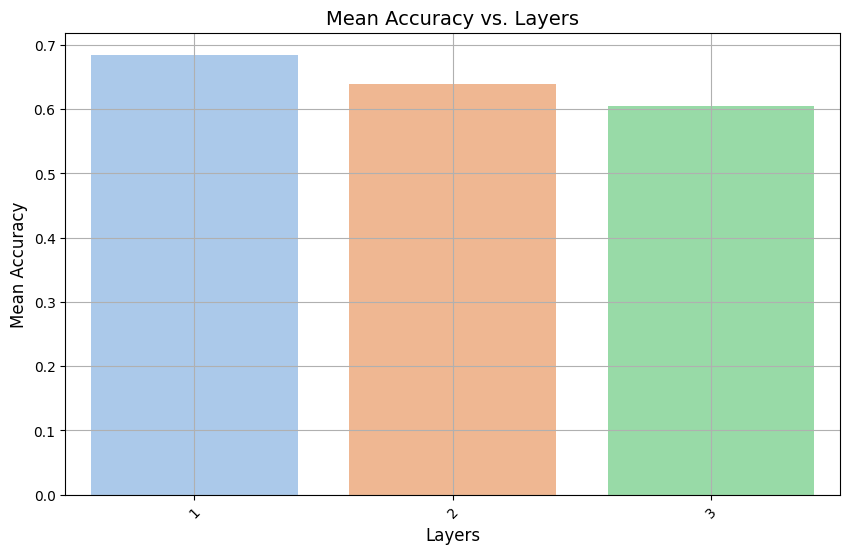

<ipython-input-102-71cbe658251d>:19: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=mean_accuracy_by_hyperparameter, x=param, y='accuracy', ci=None, palette="pastel")
<ipython-input-102-71cbe658251d>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mean_accuracy_by_hyperparameter, x=param, y='accuracy', ci=None, palette="pastel")


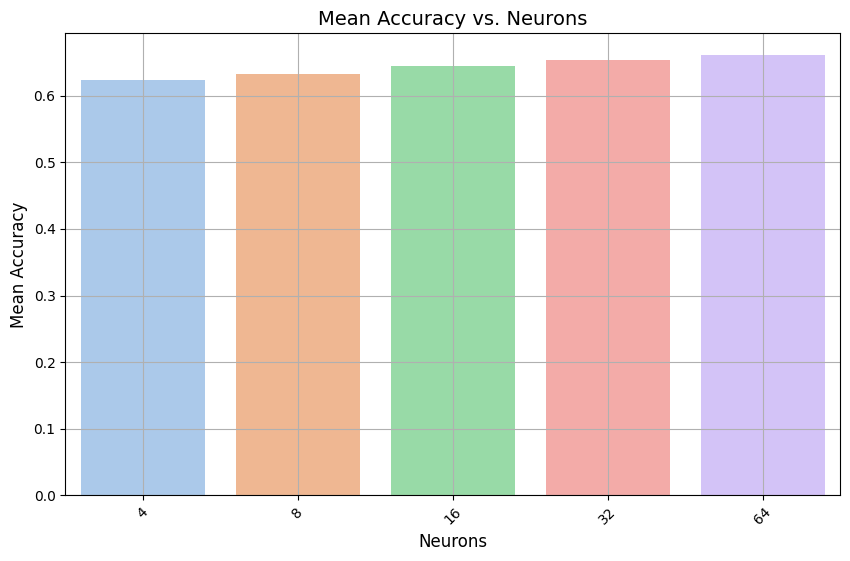

<ipython-input-102-71cbe658251d>:19: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=mean_accuracy_by_hyperparameter, x=param, y='accuracy', ci=None, palette="pastel")
<ipython-input-102-71cbe658251d>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mean_accuracy_by_hyperparameter, x=param, y='accuracy', ci=None, palette="pastel")


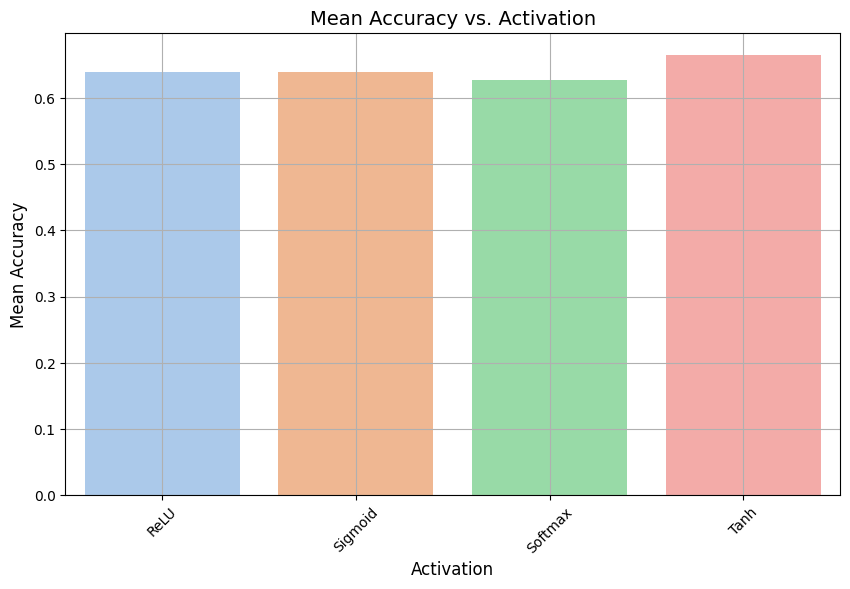

<ipython-input-102-71cbe658251d>:19: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=mean_accuracy_by_hyperparameter, x=param, y='accuracy', ci=None, palette="pastel")
<ipython-input-102-71cbe658251d>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mean_accuracy_by_hyperparameter, x=param, y='accuracy', ci=None, palette="pastel")


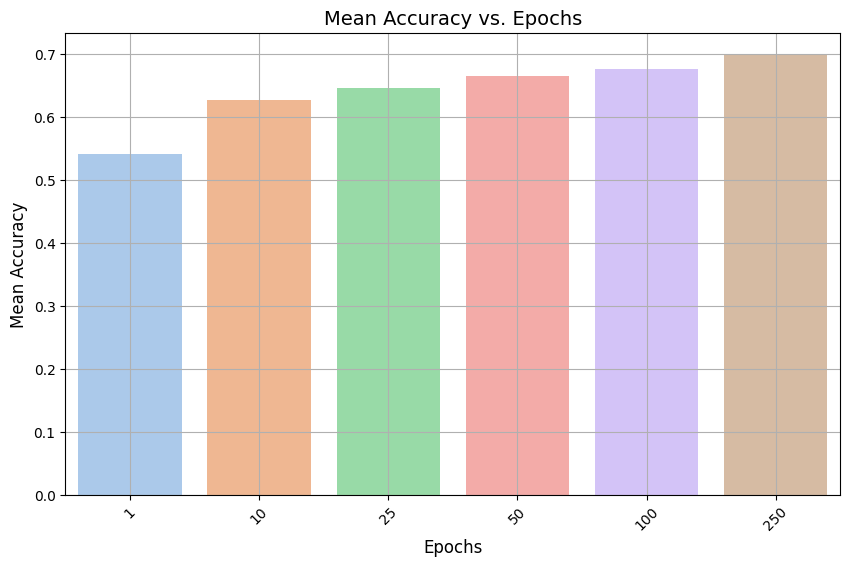

<ipython-input-102-71cbe658251d>:19: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=mean_accuracy_by_hyperparameter, x=param, y='accuracy', ci=None, palette="pastel")
<ipython-input-102-71cbe658251d>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mean_accuracy_by_hyperparameter, x=param, y='accuracy', ci=None, palette="pastel")


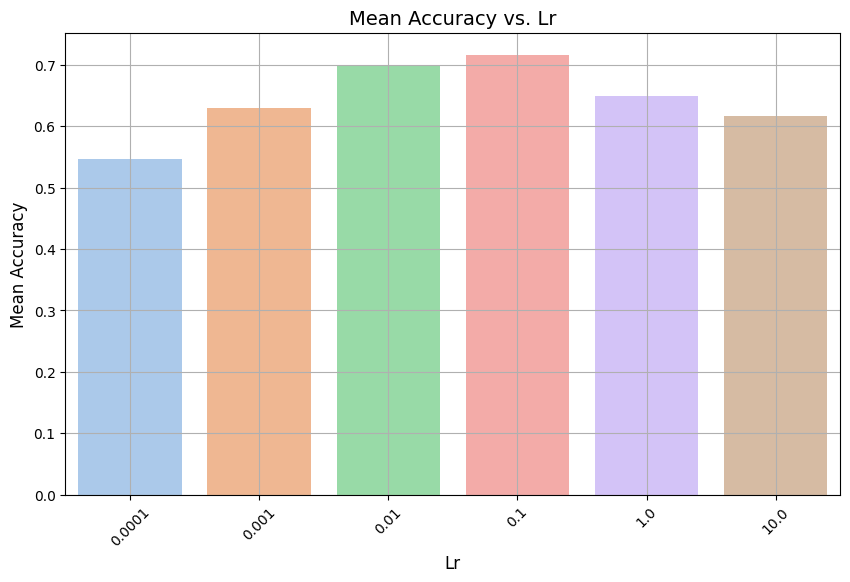

<ipython-input-102-71cbe658251d>:19: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=mean_accuracy_by_hyperparameter, x=param, y='accuracy', ci=None, palette="pastel")
<ipython-input-102-71cbe658251d>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mean_accuracy_by_hyperparameter, x=param, y='accuracy', ci=None, palette="pastel")


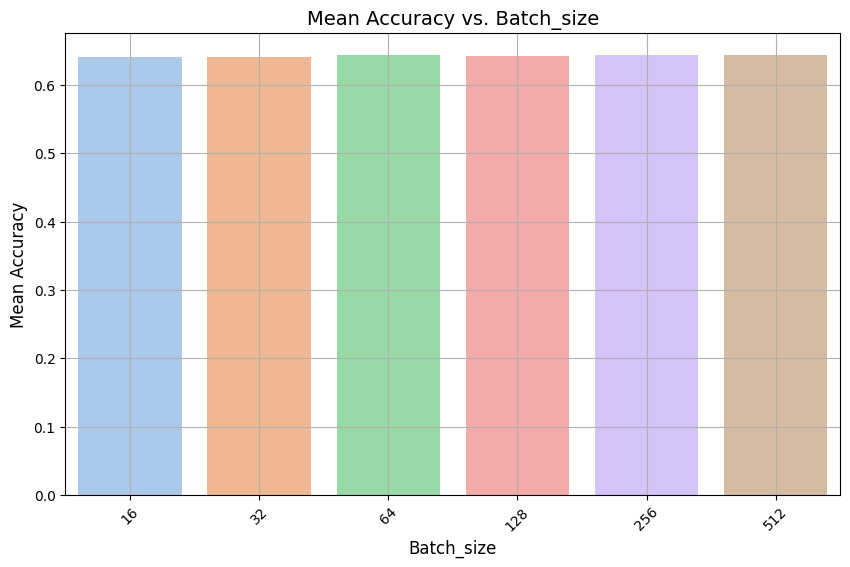

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load the DataFrame containing the experiment results
# Ensure 'results_df' exists after executing the previous code
results_df = pd.read_csv("mlp_classification_hidden layer 123.csv")

# Calculate the mean accuracy for each hyperparameter combination
# Changed 'mae' to 'accuracy' to compute and visualize accuracy
mean_accuracy_by_hyperparameter = results_df.groupby(['layers', 'neurons', 'activation', 'epochs', 'lr', 'batch_size'])['accuracy'].mean().reset_index()

# List of hyperparameters to visualize
hyperparameters = ['layers', 'neurons', 'activation', 'epochs', 'lr', 'batch_size']

# Create bar plots for each hyperparameter
for param in hyperparameters:
    plt.figure(figsize=(10, 6))
    # Changed 'mae' to 'accuracy' in sns.barplot and ylabel
    sns.barplot(data=mean_accuracy_by_hyperparameter, x=param, y='accuracy', ci=None, palette="pastel")
    plt.title(f'Mean Accuracy vs. {param.capitalize()}', fontsize=14)  # Changed title to represent Accuracy
    plt.xlabel(param.capitalize(), fontsize=12)
    plt.ylabel('Mean Accuracy', fontsize=12)  # Changed ylabel to represent Accuracy
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

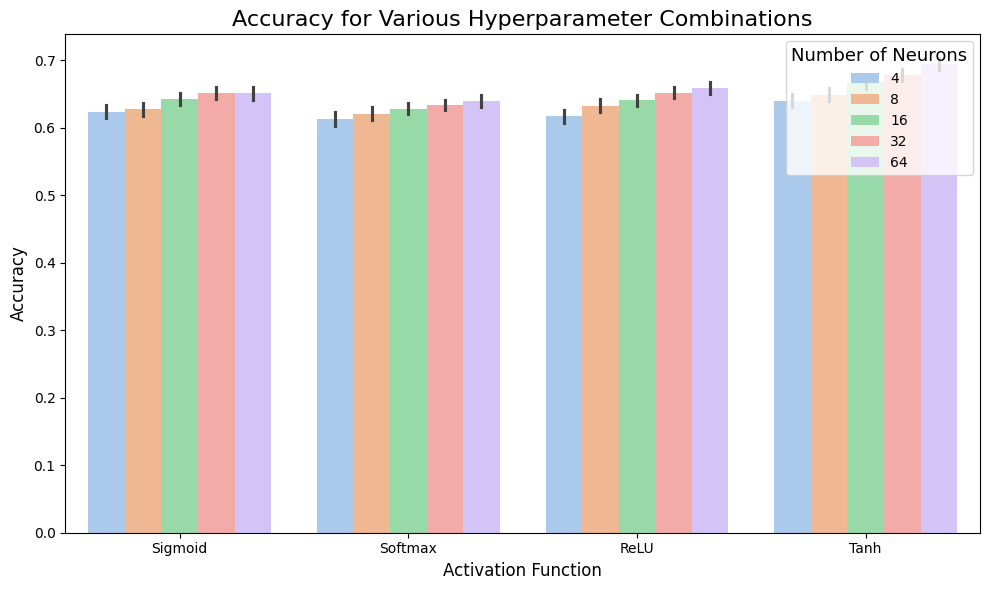

In [103]:
# Load the DataFrame containing the experiment results
# Ensure 'results_df' exists after executing the previous code
results_df = pd.read_csv("mlp_classification_hidden layer 123.csv")

# Plot accuracy for each combination of hyperparameters
plt.figure(figsize=(10, 6))

# Change 'mse' to 'accuracy' for the y-axis parameter
sns.barplot(data=results_df, x='activation', y='accuracy', hue='neurons', palette='pastel')

# Add title and labels
plt.title('Accuracy for Various Hyperparameter Combinations', fontsize=16)  # Changed the title to represent Accuracy
plt.xlabel('Activation Function', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)  # Changed the y-axis label to represent Accuracy
plt.legend(title='Number of Neurons', title_fontsize='13', loc='upper right')

# Display the plot with proper layout
plt.tight_layout()
plt.show()
